# "Data is Dirty
## I Repeat data is dirty"




![](https://th.bing.com/th/id/OIP.ETmCZRVzJ5xNc3f8REj9KQHaFt?pid=ImgDet&rs=1)

Data preprocessing is a major part of any machine learning process. As we know the major part of any machine learning model is for sure data and if the data is not in proper shape and form, the model will not perform at its best. So we have to make sure we process the data in right form so that future work on the data becomes meaningful.

The major steps in Data Preprocessing are:
1. Data Collection
2. Importing Libraries
3. Dealing with Missing data
4. Data Reduction
5. Feature Importance / Feature Selection
6. Standardization
7. PCA
8. Train_test


# 1. Data Collection
Data is everything, without data there is no machine learning models. So the first step is always data collection. We have to collect data from various resources. sometimes in real life scenario we need to scrap data from various resources as formatted data is not available. for that various libraries and extension are available. However here, we are mainly focused in collecting data from various datasets centres, websites that have achieves of various data. We can collect data from [www.kaggle.com](https://www.kaggle.com) or [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/) .

Other to it, you can do data scraping using various libraries or tools to get data but as of now, YO 2Ta WEBSITES WILL BE ENOUGH.


# 2. Importing Libraries
we have to import all the important libraries that will be used for all the preprocessing. The basis python libraries are: NumPy, Pandas, Matplotlib, seaborn, sKlearn........

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Dealing with missing data

1. Data missed at Random
    
    During survey or at the time of data collection, the participants might missed filling up certain data, this can be a reason data are missing.
    
2. Data missed at Reason
    
    There can the scenario where the participants intentionally doesnt want to provide certain data like the phone number or the address for personal reasons. This can be the reason, the dataset can have multiple Null values.

So, if we came across missing data, we have to follow following types of ideas to deal with missing data.

First we have to check the number of missing data in a column. If the percentage of missing data is more than 60% of the total data points, then there is no reason we have to keep that data column as it will have negative response to our future Machine Learning model. So, its always better to drop these columns.

Second, we can also drop rows if the number of Null values of a certain column is very less, as it will have no impact over large dataset.

What we can also do is use statistical method to figure out what to replace with the missing data.

In case of numerical data, we can go with Mean of the entire column and then replace with mean to the Null values.
In case of categorical data, we can use mode to replace the missing values.

The ideas how to generate mean can slightly be different accoring to the kind of dataset we are working on. If one column is highly co-related with another column, what we can do is find mean as per the another column and replace as per it.

Let's take an example for it, like we have two column, GDP and Country. So replacing mean of entire GDP column will not be a good idea as there will be GDP for both Rich and Poor Countries and sometimes, the missing values can be of Poor country, so mean will still be very high GDP for that country.

Instead what we can do is, aggregate all the mean of particular country and find mean of that country only and replace it with that mean.

In [ ]:
import numpy as np
from io import StringIO

In [ ]:
csv_data = \
            '''
            A,B,C,D
            1.0, 2.0, 3.0, 4.0
            5.0, 6.0,,8.0
            10.0,11.0,12.0
            '''

In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv(StringIO(csv_data))


In [ ]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# Number of missing values in each feature column
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [ ]:
df.isnull().sum()

            A    0
B                0
C                1
D                1
dtype: int64

In [ ]:
df.values


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

###### One of the most simplest echnique is to remove the orw or colum with tha tcontaisn missing data

In [ ]:
# drop rows
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# drop columns
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


dropna , method has other several parameters, such as ,
 1. only drop rows where all columsna re NAN

In [ ]:
df.dropna(how='all') # no colum has alll NAN values

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# drop rows that has less tha 4 real values

df.dropna(thresh=3) # row 1 and 2 has only 3 real values, so dropped

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# onlt drop rows where NAN apperas in the spicific Column

df.dropna(subset=['C']) # NAN appears in 1 row in C column


,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


#### Imputing Missing values

In [ ]:
df['C']

0     3.0
1     NaN
2    12.0
Name: C, dtype: float64

In [ ]:
mean = df['C'].mean()
mean
df['C'].fillna(mean)

0     3.0
1     7.5
2    12.0
Name: C, dtype: float64

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imr = SimpleImputer(missing_values= np.NaN, strategy='mean') #axis concept in SimpleImputer

In [ ]:
?SimpleImputer

In [ ]:
imr = imr.fit(df.values)
imr.fit_transform(df.values)

# fit, transform, fit_transform

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
imputed_data = imr.transform(df.values)

In [ ]:
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

#### Scikit Learn Estimator API

fit - learn the parameter from training data

transform - uses those learned paramters to trasform the data.

## Handling Categorical Data

###### Nominal and Ordinal features
 1. Ordinal - thoese featurs that can be sorted e.g. T shirt Size XL > L > M > S
 2. Nominal - that cannot be sorted e.g. T shirt Color , red, greeen,

In [ ]:
import pandas as pd

In [ ]:
df= pd.DataFrame([
    ['greeen', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])

df.columns = ['color', 'size','price', 'classlabel']


In [ ]:
df

,color,size,price,classlabel
0,greeen,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


###### Mapping Ordinal Features

e.g
XL = L +1 = M+2

In [ ]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}

In [ ]:
df['size'] = df['size'].map(size_mapping)

In [ ]:
df

,color,size,price,classlabel
0,greeen,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


#### Encoding the Class labels

In [ ]:
import numpy as np

In [ ]:
df

,color,size,price,classlabel
0,greeen,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [ ]:
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [ ]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [ ]:
df['classlabel'].unique()

array(['class1', 'class2'], dtype=object)

In [ ]:
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df['classlabel'] =df['classlabel'].map(class_mapping)

In [ ]:
df

,color,size,price,classlabel
0,greeen,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


Scikit learn Label Encoder can also be used here

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
class_le = LabelEncoder()


In [ ]:
y = class_le.fit_transform(df['classlabel'].values)

In [ ]:
y

array([0, 1, 0])

In [ ]:
X = df.values
X
df

,color,size,price,classlabel
0,greeen,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


#### Performing one Hot Encoding in Nominal Feaures

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'),[0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)


In [ ]:
X = ct.fit_transform(X)

In [ ]:
X
#blue, green, red

array([[0.0, 1.0, 0.0, 1, 10.1, 0],
       [0.0, 0.0, 1.0, 2, 13.5, 1],
       [1.0, 0.0, 0.0, 3, 15.3, 0]], dtype=object)

green -> (0 1 0)

red -> (0 0 1)

blue -> (1 0 0)

In [ ]:
# can also use pandas get_dummies

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])


,price,size,color_blue,color_greeen,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## Partitioning data in train - test
training set ko data

validation set ko data

testing set ko data

 Train Test Split

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header=None)

In [ ]:
df_wine.columns =['Class label', 'Alcohol', 'Malic acid', 'Ash',
                 'Alcalinity of ash',
                  'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline'
                 ]

In [ ]:
df_wine
#target, features...y, X

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
np.unique(df_wine['Class label'])

array([1, 2, 3])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X ,y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size =0.2, random_state = 42, stratify =y)

In [ ]:
X_test

array([[1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.217e+01, 1.450e+00, 2.530e+00, 1.900e+01, 1.040e+02, 1.890e+00,
        1.750e+00, 4.500e-01, 1.030e+00, 2.950e+00, 1.450e+00, 2.230e+00,
        3.550e+02],
       [1.419e+01, 1.590e+00, 2.480e+00, 1.650e+01, 1.080e+02, 3.300e+00,
        3.930e+00, 3.200e-01, 1.860e+00, 8.700e+00, 1.230e+00, 2.820e+00,
        1.680e+03],
       [1.406e+01, 2.150e+00, 2.610e+00, 1.760e+01, 1.210e+02, 2.600e+00,
        2.510e+00, 3.100e-01, 1.250e+00, 5.050e+00, 1.060e+00, 3.580e+00,
        1.295e+03],
       [1.307e+01, 1.500e+00, 2.100e+00, 1.550e+01, 9.800e+01, 2.400e+00,
        2.640e+00, 2.800e-01, 1.370e+00, 3.700e+00, 1.180e+00, 2.690e+00,
        1.020e+03],
       [1.372e+01, 1.430e+00, 2.500e+00, 1.670e+01, 1.080e+02, 3.400e+00,
        3.670e+00, 1.900e-01, 2.040e+00, 6.800e+00, 8.900e-01, 2.870e+00,
        1.28

### Bringing Features into the same scales

#### Normaizlation - in range of (0, 1)

![](https://i.stack.imgur.com/EuitP.png)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()



In [ ]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

#### Standarization - mean -0 ,  Var -1

![](https://cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
stdsc = StandardScaler()

In [ ]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Dimensionality reduction

There are two general approaches to *reducing* the number of dimensions (i.e. features) in a dataset.  One is by creating synthetic features that globally combine the raw features.  Several different mathematical techniques are available for doing this.

The other means by which we might reduce dimensions is simply by discarding ones that seem to have little significance to the model.  Very often models actually perform *better* by removing features that are either purely independent of the target or are largely redundant with other features (i.e. highly correlated).  In every case, models can be trained *faster* with fewer dimensions.

## Decomposition

PCA is the oldest and most widely used method for decomposition of dimensional information.  Other methods of decomposition are also provided by scikit-learn.  In broad concept they do something similar, but each shows strengths relative to different datasets; understanding the difference is a mixture of domain familiarity and trial-and-error.

### Miscellaneous decompositions

This lesson will not specifically discuss all of the decomposition classes available in `sklearn.decomposition`.  A complete list with brief descriptions from the [documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) is below.  The discussion and examples of reconstructed faces in the [user guide](http://scikit-learn.org/stable/modules/decomposition.html) is very useful.

| Class name          | Description
|---------------------|------------------------------------
| DictionaryLearning  | Dictionary learning
| FactorAnalysis      | Factor Analysis (FA)
| FastICA             | FastICA: a fast algorithm for Independent Component Analysis.
| IncrementalPCA      | Incremental principal components analysis (IPCA).
| KernelPCA           | Kernel Principal component analysis (KPCA)
| LatentDirichletAllocation | Latent Dirichlet Allocation with online variational Bayes algorithm
| MiniBatchDictionaryLearning | Mini-batch dictionary learning
| MiniBatchSparsePCA  | Mini-batch Sparse Principal Components Analysis
| NMF                 | Non-Negative Matrix Factorization (NMF)
| PCA                 | Principal component analysis (PCA)
| SparsePCA           | Sparse Principal Components Analysis (SparsePCA)
| SparseCoder         | Sparse coding
| TruncatedSVD        | Dimensionality reduction using truncated SVD (aka LSA).
| dict_learning       | Solves a dictionary learning matrix factorization problem.
| dict_learning_online| Solves a dictionary learning matrix factorization problem online.
| fastica             | Perform Fast Independent Component Analysis.
| sparse_encode       | Sparse coding


## Principal component analysis (PCA)

Good Animation: https://setosa.io/ev/principal-component-analysis/


Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The transformation is defined in such a way that the first principal component accounts for as much of the variability in the data as possible, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

An explanation written by [Hernán Eche for Stack Exchange](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) contained a very nice animation illustrating minimization of variance to find a first principal component. It is easier to understand with a 2-D parametric space, as in the animation.

![PCA animation](https://builtin.com/sites/www.builtin.com/files/inline-images/national/Principal%2520Component%2520Analysis%2520second%2520principal.gif)


![](https://upload.wikimedia.org/wikipedia/commons/9/9c/PCA_Projection_Illustration.gif)

Let us look at sample data. We will choose the Wisconsin breast cancer dataset. It has 30 features measuring a variety of numeric medical diagnostic results.

First thing, we load the dataset and apply standard scaling to the features.  Later in this lesson we will talk more about scaling, and we have brushed on it in a few previous lessons.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Perform a standard train/test split as we have with almost all models.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, cancer.target, random_state=1)

For pending comparison, let us remind ourselves of how the raw data preforms using two classifers: `LinearRegression` and `KNeighborsClassifier`.

In [ ]:
from sklearn.linear_model import LinearRegression
(LinearRegression()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.7222686011972143

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.951048951048951

Now we transform the parametric space of the features into just two dimensions that contain the maximum amount of information that **can be** represented in two dimensions.

In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Looking at a scatter plot, we can see that just two dimensions already get rather good differentiation visually.  Notice that these two components each represent an arbitrary combination of all the actual observational measurements in the dataset.  Therefore, they do not have any obvious English description other than "first component" and "second component."

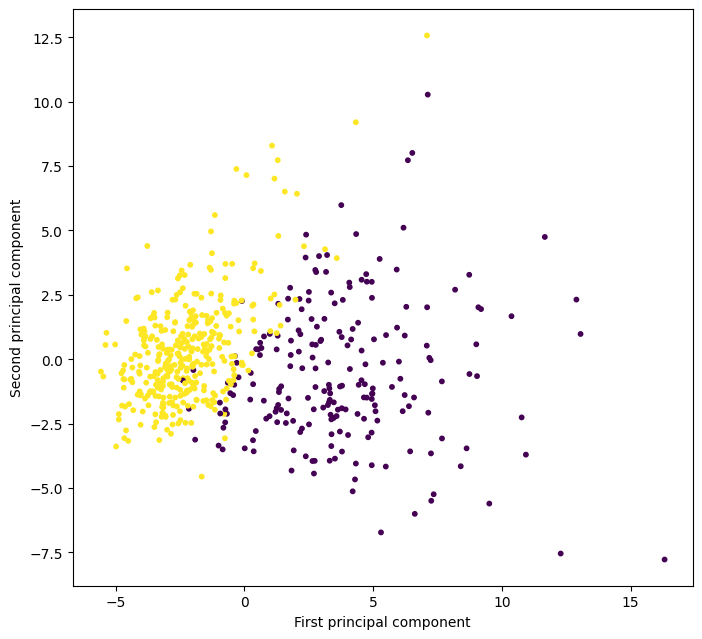

In [ ]:
# plot 1st vs 2nd principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=cancer.target, s=10)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

With just two components retained, the linear regression performs a bit worse, but KNN (that is much stronger so far for this data, in any case), performs basically equally well as with all 30 dimensions.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, cancer.target, random_state=1)

In [ ]:
(LinearRegression()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.627986420655767

In [ ]:
(KNeighborsClassifier()
    .fit(X_train, y_train)
    .score(X_test, y_test))

0.9440559440559441

We can see how the two PCA components are derived by linear combination of the original 30.

In [ ]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Or more visually (but only some original features shown for legibility):

<Figure size 2000x1500 with 0 Axes>

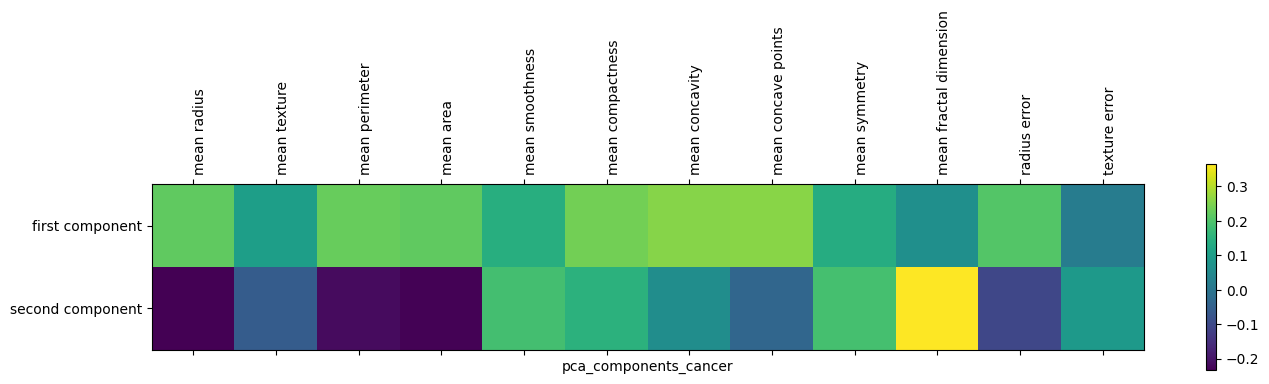

In [ ]:
# Not all original features shown...
nfeat = 12
plt.figure(figsize=(20,15))
plt.matshow(pca.components_[:,:nfeat], cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(nfeat),
           cancer.feature_names[:nfeat], rotation=90, ha='left');
plt.xlabel("pca_components_cancer");

In [ ]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X ,y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size =0.3, random_state =0, stratify =y)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
stdsc = StandardScaler()

In [ ]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Accessing Feature Importance wih random Forest


Feature Selection with Importance; Feature Importance. Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels = df_wine.columns[1:]

In [ ]:
feat_labels

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [ ]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
importances = forest.feature_importances_

In [ ]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [ ]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1 ,30, feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


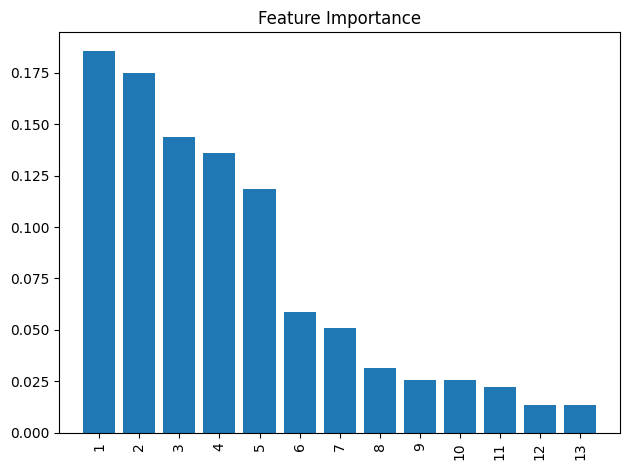

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')

plt.xticks(range(X_train.shape[1]),range(1, 14), rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [ ]:
X_selected = sfm.transform(X_train)

In [ ]:
X_selected

array([[1.362000e+01, 8.000000e-01, 4.400000e+00, 2.050000e+00,
        5.500000e+02],
       [1.376000e+01, 2.740000e+00, 5.400000e+00, 3.000000e+00,
        1.235000e+03],
       [1.373000e+01, 3.250000e+00, 5.700000e+00, 2.710000e+00,
        1.285000e+03],
       [1.351000e+01, 2.530000e+00, 4.200000e+00, 2.870000e+00,
        1.095000e+03],
       [1.260000e+01, 6.600000e-01, 7.100000e+00, 1.580000e+00,
        6.950000e+02],
       [1.208000e+01, 2.290000e+00, 2.900000e+00, 3.190000e+00,
        3.850000e+02],
       [1.222000e+01, 2.040000e+00, 2.700000e+00, 3.020000e+00,
        3.120000e+02],
       [1.251000e+01, 5.800000e-01, 5.450000e+00, 1.510000e+00,
        6.500000e+02],
       [1.269000e+01, 1.460000e+00, 3.050000e+00, 2.060000e+00,
        4.950000e+02],
       [1.182000e+01, 1.640000e+00, 2.060000e+00, 2.440000e+00,
        4.150000e+02],
       [1.349000e+01, 1.840000e+00, 3.740000e+00, 2.780000e+00,
        4.720000e+02],
       [1.388000e+01, 3.560000e+00, 5.43000

In [ ]:
print('Number of samples that meet this criterion:',X_selected.shape[0])
print('Number of samples that meet this criterion:',len(X_selected))

Number of samples that meet this criterion: 124
Number of samples that meet this criterion: 124


In [ ]:
for f in range(X_selected.shape[1]):print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
